# Data Management

In [2]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from pandas import read_csv

In [2]:
%pip install rdflib 
import rdflib
%pip install SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install sparql-dataframe
%pip install pyproj
%pip install bokeh

import sparql_dataframe
import pandas as pd

from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, CARTODBPOSITRON
from bokeh.io import output_notebook, show
from bokeh.models import LogColorMapper, ColumnDataSource
from bokeh.palettes import Oranges256 as oranges

from pyproj import Proj, transform

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


### Setting the endpoint

In [4]:
led_endpoint="http://data.open.ac.uk/sparql"

sparql_wd = SPARQLWrapper(led_endpoint)

### Data extraction and Cleansing

Retrieving the performances

In [126]:
query="""
PREFIX dc: <http://purl.org/dc/terms/>
PREFIX edtf: <http://data.open.ac.uk/edtf/ontology/>
PREFIX edtfdata: <http://data.open.ac.uk/time/edtf/>
PREFIX event: <http://purl.org/NET/c4dm/event.owl#>
PREFIX led: <http://led.kmi.open.ac.uk/term/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>
prefix mo:<http://purl.org/ontology/mo/>
SELECT DISTINCT   ?lexp  ?perflabel ?yoc
WHERE {
   ?lexp event:time [ rdfs:label ?when ; edtf:century edtfdata:Century.19 ; edtf:yearOfCentury/rdf:value ?yoc ].
   ?lexp  dc:subject ?perf.
   ?perf rdfs:label ?perflabel.
   ?perf mo:instrument ?instrument.
   ?instrument rdfs:label ?instrumentlabel.
   ?perf mo:genre ?genre.
   ?genre rdfs:label ?genrelabel.
   FILTER ( ?yoc >= 10 && ?yoc <= 25 ) 
}
"""

# use sparql dataframe to transform the SPARQL Json directly into a dataframe
df_perf = sparql_dataframe.get(led_endpoint, query, post=True)
df_perf

,lexp,perflabel,yoc
0,http://data.open.ac.uk/led/lexp/1434713465249,performance of 'Elgar Cello Concerto',24
1,http://data.open.ac.uk/led/lexp/1450111048055,performance of 'Bart��k's violin sonata',23
2,http://data.open.ac.uk/led/lexp/1463778527046,performance of 'Songs',25
3,http://data.open.ac.uk/led/lexp/1434888849270,performance of 'Trois Petites Pi��ces pour Qua...,24
4,http://data.open.ac.uk/led/lexp/1464085795357,performance of 'Foxtrots',25
...,...,...,...
301,http://data.open.ac.uk/led/lexp/1464521657393,performance of 'Chastushki',25
302,http://data.open.ac.uk/led/lexp/1464041465931,performance of 'Piano Concerto',25
303,http://data.open.ac.uk/led/lexp/1464219122848,performance of 'Ragtime',25
304,http://data.open.ac.uk/led/lexp/1464085368509,performance of 'New ballet score',25


In [127]:
#adding 19 to yoc values
#creating a new column containing complete years as integers
lista=[]
for index, row in df_perf.iterrows():
  
    value="19"+str(row['yoc'])
    lista.append(value)

my_year= pd.Series(lista).astype(int)
df_perf['year']=my_year
df_perf

,lexp,perflabel,yoc,year
0,http://data.open.ac.uk/led/lexp/1434713465249,performance of 'Elgar Cello Concerto',24,1924
1,http://data.open.ac.uk/led/lexp/1450111048055,performance of 'Bart��k's violin sonata',23,1923
2,http://data.open.ac.uk/led/lexp/1463778527046,performance of 'Songs',25,1925
3,http://data.open.ac.uk/led/lexp/1434888849270,performance of 'Trois Petites Pi��ces pour Qua...,24,1924
4,http://data.open.ac.uk/led/lexp/1464085795357,performance of 'Foxtrots',25,1925
...,...,...,...,...
301,http://data.open.ac.uk/led/lexp/1464521657393,performance of 'Chastushki',25,1925
302,http://data.open.ac.uk/led/lexp/1464041465931,performance of 'Piano Concerto',25,1925
303,http://data.open.ac.uk/led/lexp/1464219122848,performance of 'Ragtime',25,1925
304,http://data.open.ac.uk/led/lexp/1464085368509,performance of 'New ballet score',25,1925


In [128]:
#dropping the yoc column
df_perf.drop(columns=['yoc'])

,lexp,perflabel,year
0,http://data.open.ac.uk/led/lexp/1434713465249,performance of 'Elgar Cello Concerto',1924
1,http://data.open.ac.uk/led/lexp/1450111048055,performance of 'Bart��k's violin sonata',1923
2,http://data.open.ac.uk/led/lexp/1463778527046,performance of 'Songs',1925
3,http://data.open.ac.uk/led/lexp/1434888849270,performance of 'Trois Petites Pi��ces pour Qua...,1924
4,http://data.open.ac.uk/led/lexp/1464085795357,performance of 'Foxtrots',1925
...,...,...,...
301,http://data.open.ac.uk/led/lexp/1464521657393,performance of 'Chastushki',1925
302,http://data.open.ac.uk/led/lexp/1464041465931,performance of 'Piano Concerto',1925
303,http://data.open.ac.uk/led/lexp/1464219122848,performance of 'Ragtime',1925
304,http://data.open.ac.uk/led/lexp/1464085368509,performance of 'New ballet score',1925


In [27]:
#absolute freq. of performances
df_perf['perflabel'].value_counts()

performance of 'Songs'                               6
performance of 'Piano Concerto'                      6
performance of 'Les Biches'                          4
performance of 'The Love of Three Oranges, Op.33'    3
performance of 'Mavra (1922)'                        3
                                                    ..
performance of 'Haydn Cello Concerto in D'           1
performance of 'Beethoven'                           1
performance of 'Brahms'                              1
performance of 'Schumann'                            1
performance of 'unknown'                             1
Name: perflabel, Length: 253, dtype: int64

## retrieving instruments

In [73]:
query="""
PREFIX dc: <http://purl.org/dc/terms/>
PREFIX edtf: <http://data.open.ac.uk/edtf/ontology/>
PREFIX edtfdata: <http://data.open.ac.uk/time/edtf/>
PREFIX event: <http://purl.org/NET/c4dm/event.owl#>
PREFIX led: <http://led.kmi.open.ac.uk/term/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>
prefix mo:<http://purl.org/ontology/mo/>
SELECT DISTINCT   ?lexp  ?instrument ?yoc
WHERE {
   ?lexp event:time [ rdfs:label ?when ; edtf:century edtfdata:Century.19 ; edtf:yearOfCentury/rdf:value ?yoc ].
   ?lexp  dc:subject ?perf.
   ?perf rdfs:label ?perflabel.
   ?perf mo:instrument ?instrument.
   ?instrument rdfs:label ?instrumentlabel.
   
   FILTER ( ?yoc >= 10 && ?yoc <= 25 ) 
}
"""

# use sparql dataframe to transform the SPARQL Json directly into a dataframe
df_instr = sparql_dataframe.get(led_endpoint, query, post=True)
df_instr.head()

,lexp,instrument,yoc
0,http://data.open.ac.uk/led/lexp/1402915111602,http://dbpedia.org/resource/Military_band,19
1,http://data.open.ac.uk/led/lexp/1449945081156,http://dbpedia.org/resource/Choir,11
2,http://data.open.ac.uk/led/lexp/1433140776828,http://dbpedia.org/resource/Choir,10
3,http://data.open.ac.uk/led/lexp/1450107526002,http://dbpedia.org/resource/Choir,11
4,http://data.open.ac.uk/led/lexp/1402068023738,http://dbpedia.org/resource/Drum,14


### Extracting the labels

In [74]:
h=[]
for value in df_instr['instrument']:
  if "http://dbpedia.org/resource/" in value :
    new= str(value).replace("http://dbpedia.org/resource/", "")
    h.append(new)
  elif "https://data.open.ac.uk/led/thing/" in value:
    new= str(value).replace("https://data.open.ac.uk/led/thing/", "")
    h.append(new)
  elif "http://data.open.ac.uk/led/thing/" in value :
    new= str(value).replace("http://data.open.ac.uk/led/thing/", "")
    h.append(new)
  elif "http://data.open.ac.uk/led/" in value:
    new= str(value).replace("http://data.open.ac.uk/led/", "")
    h.append(new)
   
  elif "http://bnb.data.bl.uk/id/agent" in value :
    new= str(value).replace("http://bnb.data.bl.uk/id/agent", "")
    h.append(new)
  
  else:
    print(value)
    h.append(value)
instrument_label= pd.Series(h).astype(str)
df_instr['instrument_label']=instrument_label
df_instr

,lexp,instrument,yoc,instrument_label
0,http://data.open.ac.uk/led/lexp/1402915111602,http://dbpedia.org/resource/Military_band,19,Military_band
1,http://data.open.ac.uk/led/lexp/1449945081156,http://dbpedia.org/resource/Choir,11,Choir
2,http://data.open.ac.uk/led/lexp/1433140776828,http://dbpedia.org/resource/Choir,10,Choir
3,http://data.open.ac.uk/led/lexp/1450107526002,http://dbpedia.org/resource/Choir,11,Choir
4,http://data.open.ac.uk/led/lexp/1402068023738,http://dbpedia.org/resource/Drum,14,Drum
...,...,...,...,...
498,http://data.open.ac.uk/led/lexp/1399468859293,http://dbpedia.org/resource/Organ_(music),16,Organ_(music)
499,http://data.open.ac.uk/led/lexp/1464045131803,http://dbpedia.org/resource/Symphony_orchestra,25,Symphony_orchestra
500,http://data.open.ac.uk/led/lexp/1406802536207,http://dbpedia.org/resource/Symphony_orchestra,14,Symphony_orchestra
501,http://data.open.ac.uk/led/lexp/1397647311784,http://dbpedia.org/resource/Contralto,16,Contralto


In [75]:
#adding 19 to yoc values
#creating a new column containing complete years as integers
lista=[]
for index, row in df_instr.iterrows():
  
    value="19"+str(row['yoc'])
    lista.append(value)

my_year= pd.Series(lista).astype(int)
df_instr['year']=my_year
df_instr.drop(columns=['yoc'])

,lexp,instrument,instrument_label,year
0,http://data.open.ac.uk/led/lexp/1402915111602,http://dbpedia.org/resource/Military_band,Military_band,1919
1,http://data.open.ac.uk/led/lexp/1449945081156,http://dbpedia.org/resource/Choir,Choir,1911
2,http://data.open.ac.uk/led/lexp/1433140776828,http://dbpedia.org/resource/Choir,Choir,1910
3,http://data.open.ac.uk/led/lexp/1450107526002,http://dbpedia.org/resource/Choir,Choir,1911
4,http://data.open.ac.uk/led/lexp/1402068023738,http://dbpedia.org/resource/Drum,Drum,1914
...,...,...,...,...
498,http://data.open.ac.uk/led/lexp/1399468859293,http://dbpedia.org/resource/Organ_(music),Organ_(music),1916
499,http://data.open.ac.uk/led/lexp/1464045131803,http://dbpedia.org/resource/Symphony_orchestra,Symphony_orchestra,1925
500,http://data.open.ac.uk/led/lexp/1406802536207,http://dbpedia.org/resource/Symphony_orchestra,Symphony_orchestra,1914
501,http://data.open.ac.uk/led/lexp/1397647311784,http://dbpedia.org/resource/Contralto,Contralto,1916


### Absolute frequency of instruments

In [76]:
df_instr['instrument_label'].value_counts()

Piano                    87
Orchestra                65
Human_voice              61
Symphony_orchestra       34
Female_vocals            31
Violin                   28
Male_vocals              24
Soprano                  18
Choir                    15
Cello                    15
Organ_(music)            11
Military_band            10
Clarinet                  9
Tenor                     7
/Bass                     5
Trumpet                   5
Musical_ensemble          5
Drum_kit                  5
Trombone                  4
Cornet                    4
Contralto                 4
Double_bass               3
Bagpipes                  3
Jazz_band                 3
Mezzo-soprano             3
Brass_instrument          3
Wind_instrument           2
Pump_organ                2
Percussion_instrument     2
Viola                     2
Alto_saxophone            2
String_instrument         2
Bass_(voice_type)         2
Drum                      2
Harmonica                 2
Fife_(instrument)   

### Unifying equal values

In [77]:
#if df_instr['instrument_label']=='Female_vocals':
df_instr['instrument_label'] = df_instr['instrument_label'].str.replace('Female_vocals', 'Human_voice')
df_instr['instrument_label'] = df_instr['instrument_label'].str.replace('Male_vocals', 'Human_voice')
df_instr['instrument_label'] = df_instr['instrument_label'].str.replace('Singing', 'Human_voice')
df_instr['instrument_label'] = df_instr['instrument_label'].str.replace('Soprano', 'Human_voice')
df_instr['instrument_label'] = df_instr['instrument_label'].str.replace('Contralto', 'Human_voice')
df_instr['instrument_label'] = df_instr['instrument_label'].str.replace('Tenor', 'Human_voice')
df_instr['instrument_label'] = df_instr['instrument_label'].str.replace('Mezzo-soprano', 'Human_voice')
df_instr['instrument_label'] = df_instr['instrument_label'].str.replace('Choir', 'Human_voice')

df_instr['instrument_label'] = df_instr['instrument_label'].str.replace('Symphony_orchestra', 'Orchestra')

df_instr['instrument_label'] = df_instr['instrument_label'].str.replace('Chamber_orchestra', 'Orchestra')


In [78]:
df_instr['instrument_label'].value_counts()

Human_voice              164
Orchestra                100
Piano                     87
Violin                    28
Cello                     15
Organ_(music)             11
Military_band             10
Clarinet                   9
Trumpet                    5
Drum_kit                   5
/Bass                      5
Musical_ensemble           5
Cornet                     4
Trombone                   4
Double_bass                3
Brass_instrument           3
Bagpipes                   3
Jazz_band                  3
Wind_instrument            2
Percussion_instrument      2
Viola                      2
String_instrument          2
Bass_(voice_type)          2
Harmonica                  2
Fife_(instrument)          2
Alto_saxophone             2
Drum                       2
Pump_organ                 2
Pipe_organ                 1
Koto_(instrument)          1
Horn_(instrument)          1
Harp                       1
Bugle                      1
street+organ               1
Woodwind_instr

In [82]:
df_freq_instr=df_instr['instrument_label'].value_counts().nlargest(7).to_csv('Data/top_ten_instr.csv')

In [88]:
freq_i=pd.read_csv('Data/top_ten_instr.csv')
freq_i.columns =['Instrument', 'Freq']
freq_i.to_csv('Data/Instrument_freq.csv')

<AxesSubplot:xlabel='Instrument', ylabel='Freq'>

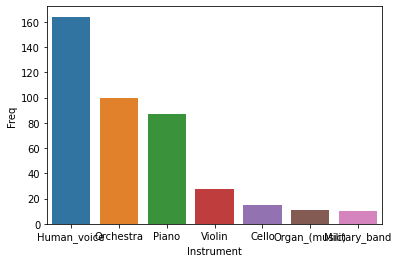

In [86]:
import seaborn as sns
sns.barplot(data=freq_i, x="Instrument", y="Freq")

## retrieving genres

In [111]:
query="""
PREFIX dc: <http://purl.org/dc/terms/>
PREFIX edtf: <http://data.open.ac.uk/edtf/ontology/>
PREFIX edtfdata: <http://data.open.ac.uk/time/edtf/>
PREFIX event: <http://purl.org/NET/c4dm/event.owl#>
PREFIX led: <http://led.kmi.open.ac.uk/term/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>
prefix mo:<http://purl.org/ontology/mo/>
SELECT DISTINCT   ?lexp  ?genre ?yoc
WHERE {
   ?lexp event:time [ rdfs:label ?when ; edtf:century edtfdata:Century.19 ; edtf:yearOfCentury/rdf:value ?yoc ].
   ?lexp  dc:subject ?perf.
   ?perf rdfs:label ?perflabel.
   
   ?perf mo:genre ?genre.
   ?genre rdfs:label ?genrelabel.
   FILTER ( ?yoc >= 10 && ?yoc <= 24 ) 
}
"""

# use sparql dataframe to transform the SPARQL Json directly into a dataframe
df_genre = sparql_dataframe.get(led_endpoint, query, post=True)
df_genre

,lexp,genre,yoc
0,http://data.open.ac.uk/led/lexp/1432984504343,http://dbpedia.org/resource/Church_music,10
1,http://data.open.ac.uk/led/lexp/1424374609798,http://dbpedia.org/resource/Classical_music,18
2,http://data.open.ac.uk/led/lexp/1425428001979,http://dbpedia.org/resource/Classical_music,20
3,http://data.open.ac.uk/led/lexp/1432545479809,http://dbpedia.org/resource/Classical_music,12
4,http://data.open.ac.uk/led/lexp/1392132841557,http://dbpedia.org/resource/Classical_music,14
...,...,...,...
345,http://data.open.ac.uk/led/lexp/1443563125215,http://data.open.ac.uk/led/musicgenre/traditio...,22
346,http://data.open.ac.uk/led/lexp/1444129601217,http://dbpedia.org/resource/Grand_opera,18
347,http://data.open.ac.uk/led/lexp/1396632036675,http://dbpedia.org/resource/Minstrel_show,15
348,http://data.open.ac.uk/led/lexp/1392135866316,http://dbpedia.org/resource/Patriotic_song,17


### Extracting the labels

In [112]:
h=[]
for value in df_genre['genre']:
  
  if "http://dbpedia.org/resource/" in value :
    new= str(value).replace("http://dbpedia.org/resource/", "")
    h.append(new)
  elif "https://data.open.ac.uk/led/thing/" in value:
    new= str(value).replace("https://data.open.ac.uk/led/thing/", "")
    h.append(new)
  elif "http://data.open.ac.uk/led/thing/" in value :
    new= str(value).replace("http://data.open.ac.uk/led/thing/", "")
    h.append(new)
  elif "http://data.open.ac.uk/led/musicgenre/" in value:
    new= str(value).replace("http://data.open.ac.uk/led/musicgenre/", "")
    h.append(new)
   
  
  
  else:
    print(value)
    
genre_label= pd.Series(h).astype(str)
df_genre['genre_label']=genre_label
#adding 19 to yoc values
#creating a new column containing complete years as integers
lista=[]
for index, row in df_genre.iterrows():
  
    value="19"+str(row['yoc'])
    lista.append(value)

my_year= pd.Series(lista).astype(int)
df_genre['year']=my_year
df_genre

,lexp,genre,yoc,genre_label,year
0,http://data.open.ac.uk/led/lexp/1432984504343,http://dbpedia.org/resource/Church_music,10,Church_music,1910
1,http://data.open.ac.uk/led/lexp/1424374609798,http://dbpedia.org/resource/Classical_music,18,Classical_music,1918
2,http://data.open.ac.uk/led/lexp/1425428001979,http://dbpedia.org/resource/Classical_music,20,Classical_music,1920
3,http://data.open.ac.uk/led/lexp/1432545479809,http://dbpedia.org/resource/Classical_music,12,Classical_music,1912
4,http://data.open.ac.uk/led/lexp/1392132841557,http://dbpedia.org/resource/Classical_music,14,Classical_music,1914
...,...,...,...,...,...
345,http://data.open.ac.uk/led/lexp/1443563125215,http://data.open.ac.uk/led/musicgenre/traditio...,22,traditional+songs,1922
346,http://data.open.ac.uk/led/lexp/1444129601217,http://dbpedia.org/resource/Grand_opera,18,Grand_opera,1918
347,http://data.open.ac.uk/led/lexp/1396632036675,http://dbpedia.org/resource/Minstrel_show,15,Minstrel_show,1915
348,http://data.open.ac.uk/led/lexp/1392135866316,http://dbpedia.org/resource/Patriotic_song,17,Patriotic_song,1917


In [113]:
#adding 19 to yoc values
#creating a new column containing complete years as integers
lista=[]
for index, row in df_genre.iterrows():
  
    value="19"+str(row['yoc'])
    lista.append(value)

my_year= pd.Series(lista).astype(int)
df_genre['year']=my_year
#dropping the yoc column
df_genre.drop(columns=['yoc'])

,lexp,genre,genre_label,year
0,http://data.open.ac.uk/led/lexp/1432984504343,http://dbpedia.org/resource/Church_music,Church_music,1910
1,http://data.open.ac.uk/led/lexp/1424374609798,http://dbpedia.org/resource/Classical_music,Classical_music,1918
2,http://data.open.ac.uk/led/lexp/1425428001979,http://dbpedia.org/resource/Classical_music,Classical_music,1920
3,http://data.open.ac.uk/led/lexp/1432545479809,http://dbpedia.org/resource/Classical_music,Classical_music,1912
4,http://data.open.ac.uk/led/lexp/1392132841557,http://dbpedia.org/resource/Classical_music,Classical_music,1914
...,...,...,...,...
345,http://data.open.ac.uk/led/lexp/1443563125215,http://data.open.ac.uk/led/musicgenre/traditio...,traditional+songs,1922
346,http://data.open.ac.uk/led/lexp/1444129601217,http://dbpedia.org/resource/Grand_opera,Grand_opera,1918
347,http://data.open.ac.uk/led/lexp/1396632036675,http://dbpedia.org/resource/Minstrel_show,Minstrel_show,1915
348,http://data.open.ac.uk/led/lexp/1392135866316,http://dbpedia.org/resource/Patriotic_song,Patriotic_song,1917


### Absolute frequency of genres

In [114]:
df_genre['genre_label'].value_counts()

Classical_music               53
Popular_music                 35
Song                          22
Ballet_(music)                20
National_anthem               19
                              ..
Traditional_Japanese_music     1
Anthem                         1
Music_of_Wales                 1
Solo_(music)                   1
Promenade_concert              1
Name: genre_label, Length: 71, dtype: int64

In [115]:
df_genre['genre_label'] = df_genre['genre_label'].str.replace('20th-century_classical_music', 'Classical_music')

df_genre['genre_label'] = df_genre['genre_label'].str.replace('traditional+song', 'Traditional_song')


C:\Users\lored\AppData\Local\Temp\ipykernel_31284\864051933.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_genre['genre_label'] = df_genre['genre_label'].str.replace('traditional+song', 'Traditional_song')


In [116]:
lista=[]
for idx, row in df_genre.iterrows():
    if row['genre_label'] =='Song':
        lista.append(idx)

df_genre.drop(lista, axis=0, inplace=True)

In [117]:
df_freq_genre=df_genre['genre_label'].value_counts().to_csv('Data/genres.csv')

In [118]:
df_freq_genre=df_genre['genre_label'].value_counts().nlargest(10).to_csv('Data/top_ten.csv')

In [119]:
freq=pd.read_csv('Data/top_ten.csv')
freq.columns =['Genre', 'Freq']

<AxesSubplot:xlabel='Genre', ylabel='Freq'>

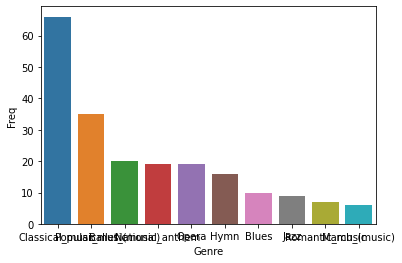

In [120]:
import seaborn as sns
sns.barplot(data=freq, x="Genre", y="Freq")

In [121]:
genre_dict=freq['Genre'].value_counts().nlargest(10).to_dict()

In [122]:
lista=[]
for idx, row in df_genre.iterrows():
    if row['genre_label'] not in genre_dict.keys():
        lista.append(idx)

df_genre.drop(lista, axis=0, inplace=True)
       

df_genre


,lexp,genre,yoc,genre_label,year
1,http://data.open.ac.uk/led/lexp/1424374609798,http://dbpedia.org/resource/Classical_music,18,Classical_music,1918
2,http://data.open.ac.uk/led/lexp/1425428001979,http://dbpedia.org/resource/Classical_music,20,Classical_music,1920
3,http://data.open.ac.uk/led/lexp/1432545479809,http://dbpedia.org/resource/Classical_music,12,Classical_music,1912
4,http://data.open.ac.uk/led/lexp/1392132841557,http://dbpedia.org/resource/Classical_music,14,Classical_music,1914
5,http://data.open.ac.uk/led/lexp/1432659496850,http://dbpedia.org/resource/Classical_music,12,Classical_music,1912
...,...,...,...,...,...
339,http://data.open.ac.uk/led/lexp/1460130143169,http://dbpedia.org/resource/20th-century_class...,24,Classical_music,1924
340,http://data.open.ac.uk/led/lexp/1434887533387,http://dbpedia.org/resource/Ballet_(music),23,Ballet_(music),1923
341,http://data.open.ac.uk/led/lexp/1460130143169,http://dbpedia.org/resource/Ballet_(music),24,Ballet_(music),1924
342,http://data.open.ac.uk/led/lexp/1481833284320,http://dbpedia.org/resource/Ballet_(music),23,Ballet_(music),1923


In [123]:
df_freq_genre=df_genre.to_csv('Data/df_genres.csv')


## Sentiment analysis with [Scikit-learn](https://scikit-learn.org/stable/):

We could analyse sentiments over time! - by adding the year in the selected variables


- training dataset: https://www.kaggle.com/datasets/parulpandey/emotion-dataset?select=validation.csv 

  provides a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5). 


In [ ]:

import pandas as pd
train = pd.read_csv('Data/training.csv')

#labelling feelings
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )


X = train['text'] 
y = train['description']

from numpy import random,array

random.seed(0)

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(ngram_range=(1,2)) 
X=vect.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

#errori = accuracy_score(y_test, p_test)
#print(errori)

#How to analyze a single query:
q=array(['good wonderful film']) 
q=vect.transform(q)

print(model.predict(q))

z=array(['horrible sad film']) 
z=vect.transform(z)
print(model.predict(z))

#

In [89]:
led_endpoint="http://data.open.ac.uk/sparql"

sparql_wd = SPARQLWrapper(led_endpoint)

In [102]:
## CQ11 What did people ‘make of’, how did they react to, e.g. music

#retrieve texts for doing sentiment analysis
query = """
PREFIX dc: <http://purl.org/dc/terms/>
PREFIX edtf: <http://data.open.ac.uk/edtf/ontology/>
PREFIX edtfdata: <http://data.open.ac.uk/time/edtf/>
PREFIX event: <http://purl.org/NET/c4dm/event.owl#>
PREFIX led: <http://led.kmi.open.ac.uk/term/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>
prefix mo:<http://purl.org/ontology/mo/>
prefix db:<http://dbpedia.org/ontology/>
prefix uk:<http://data.open.ac.uk/ukresearchproject/ontology/>
prefix ox:<http://vocab.ox.ac.uk/projectfunding#>
  
SELECT DISTINCT ?lexp  ?text  ?description ?when ?yoc
WHERE { 
  ?lexp event:time [ rdfs:label ?when ; edtf:century edtfdata:Century.19 ; edtf:yearOfCentury/rdf:value ?yoc ].
  
  ?lexp  dc:subject ?perf.
  
  ?lexp led:has_evidence_text ?text.
  FILTER ( ?yoc >= 10 && ?yoc <= 24) 
}
"""
# set the query
sparql_wd.setQuery(query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()
import pandas as pds
df_text = pds.DataFrame(results['results']['bindings'])
df_text.applymap(lambda x: x['value']) #drop the duplicates! maybe selecting the perf uri instead of songlabel


,lexp,text,when,yoc
0,http://data.open.ac.uk/led/lexp/1392134703765,Half an hour���s walk before dinner towards S...,"6 May, 1917",17
1,http://data.open.ac.uk/led/lexp/1392135866316,"At about 6 we took leave , descended the steps...","3 June, 1917",17
2,http://data.open.ac.uk/led/lexp/1402504136512,"More beer, more reminiscences...Dead and gone ...","28 June, 1917",17
3,http://data.open.ac.uk/led/lexp/1392140915897,At one station [between Corinth and Athens] a ...,"17 October, 1917",17
4,http://data.open.ac.uk/led/lexp/1400693267895,We have at last a gramophone and a very fine s...,"24 October, 1917",17
...,...,...,...,...
190,http://data.open.ac.uk/led/lexp/1434713465249,It was a busy time and that autumn Sir Edward ...,at the end of 1924,24
191,http://data.open.ac.uk/led/lexp/1430310734878,"In the end I did go down, but only to shut him...",1924,24
192,http://data.open.ac.uk/led/lexp/1430310981888,After I finished my own songs Harry Akst and J...,1924,24
193,http://data.open.ac.uk/led/lexp/1430311241404,For our take-off eight of our most attractivel...,1924,24


In [103]:
df_sent = pd.DataFrame(columns=['lexp','text','sentiment','yoc'])


idx=0
for result in results["results"]["bindings"]:
    
    q =array([result["text"]["value"]])
    q=vect.transform(q)
    sent=str(model.predict(q)).replace("[","").replace("]","")
    df_sent.loc[idx] = [str(result['lexp']['value']),str(result["text"]["value"]),str(sent),int(result["yoc"]["value"])]
    idx+=1

df_sent

,lexp,text,sentiment,yoc
0,http://data.open.ac.uk/led/lexp/1392134703765,Half an hour���s walk before dinner towards S...,'joy',17
1,http://data.open.ac.uk/led/lexp/1392135866316,"At about 6 we took leave , descended the steps...",'joy',17
2,http://data.open.ac.uk/led/lexp/1402504136512,"More beer, more reminiscences...Dead and gone ...",'joy',17
3,http://data.open.ac.uk/led/lexp/1392140915897,At one station [between Corinth and Athens] a ...,'joy',17
4,http://data.open.ac.uk/led/lexp/1400693267895,We have at last a gramophone and a very fine s...,'joy',17
...,...,...,...,...
190,http://data.open.ac.uk/led/lexp/1434713465249,It was a busy time and that autumn Sir Edward ...,'joy',24
191,http://data.open.ac.uk/led/lexp/1430310734878,"In the end I did go down, but only to shut him...",'anger',24
192,http://data.open.ac.uk/led/lexp/1430310981888,After I finished my own songs Harry Akst and J...,'joy',24
193,http://data.open.ac.uk/led/lexp/1430311241404,For our take-off eight of our most attractivel...,'joy',24


In [104]:
#adding 19 to yoc values
#creating a new column containing complete years as integers
lista=[]
for index, row in df_sent.iterrows():
  
    value="19"+str(row['yoc'])
    lista.append(value)

my_year= pd.Series(lista).astype(int)
df_sent['year']=my_year
df_sent

,lexp,text,sentiment,yoc,year
0,http://data.open.ac.uk/led/lexp/1392134703765,Half an hour���s walk before dinner towards S...,'joy',17,1917
1,http://data.open.ac.uk/led/lexp/1392135866316,"At about 6 we took leave , descended the steps...",'joy',17,1917
2,http://data.open.ac.uk/led/lexp/1402504136512,"More beer, more reminiscences...Dead and gone ...",'joy',17,1917
3,http://data.open.ac.uk/led/lexp/1392140915897,At one station [between Corinth and Athens] a ...,'joy',17,1917
4,http://data.open.ac.uk/led/lexp/1400693267895,We have at last a gramophone and a very fine s...,'joy',17,1917
...,...,...,...,...,...
190,http://data.open.ac.uk/led/lexp/1434713465249,It was a busy time and that autumn Sir Edward ...,'joy',24,1924
191,http://data.open.ac.uk/led/lexp/1430310734878,"In the end I did go down, but only to shut him...",'anger',24,1924
192,http://data.open.ac.uk/led/lexp/1430310981888,After I finished my own songs Harry Akst and J...,'joy',24,1924
193,http://data.open.ac.uk/led/lexp/1430311241404,For our take-off eight of our most attractivel...,'joy',24,1924


In [105]:
#dropping the yoc column
df_sent.drop(columns=['yoc'])

,lexp,text,sentiment,year
0,http://data.open.ac.uk/led/lexp/1392134703765,Half an hour���s walk before dinner towards S...,'joy',1917
1,http://data.open.ac.uk/led/lexp/1392135866316,"At about 6 we took leave , descended the steps...",'joy',1917
2,http://data.open.ac.uk/led/lexp/1402504136512,"More beer, more reminiscences...Dead and gone ...",'joy',1917
3,http://data.open.ac.uk/led/lexp/1392140915897,At one station [between Corinth and Athens] a ...,'joy',1917
4,http://data.open.ac.uk/led/lexp/1400693267895,We have at last a gramophone and a very fine s...,'joy',1917
...,...,...,...,...
190,http://data.open.ac.uk/led/lexp/1434713465249,It was a busy time and that autumn Sir Edward ...,'joy',1924
191,http://data.open.ac.uk/led/lexp/1430310734878,"In the end I did go down, but only to shut him...",'anger',1924
192,http://data.open.ac.uk/led/lexp/1430310981888,After I finished my own songs Harry Akst and J...,'joy',1924
193,http://data.open.ac.uk/led/lexp/1430311241404,For our take-off eight of our most attractivel...,'joy',1924


In [106]:
df_sent['sentiment'].value_counts()

'joy'         140
'love'         15
'anger'        14
'sadness'      14
'fear'          9
'surprise'      3
Name: sentiment, dtype: int64

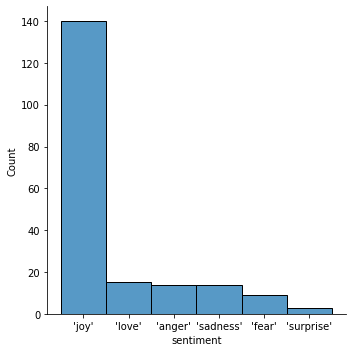

In [107]:
sns.displot(data=df_sent, x='sentiment')

## Places

In [5]:
##CQ7: Where were the places (in which they played?)

import sparql_dataframe

endpoint="http://data.open.ac.uk/sparql"

place = """PREFIX dc: <http://purl.org/dc/terms/>
PREFIX edtf: <http://data.open.ac.uk/edtf/ontology/>
PREFIX edtfdata: <http://data.open.ac.uk/time/edtf/>
PREFIX event: <http://purl.org/NET/c4dm/event.owl#>
PREFIX led: <http://led.kmi.open.ac.uk/term/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX schema: <http://schema.org/>
prefix mo:<http://purl.org/ontology/mo/>
prefix db:<http://dbpedia.org/ontology/>
prefix uk:<http://data.open.ac.uk/ukresearchproject/ontology/>
prefix ox:<http://vocab.ox.ac.uk/projectfunding#>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>  

SELECT DISTINCT  ?lexp  ?perflabel ?placelabel ?lat ?long ?yoc
WHERE { 
  ?lexp event:time [ rdfs:label ?when ; edtf:century edtfdata:Century.19 ; edtf:yearOfCentury/rdf:value ?yoc ].
  ?lexp dc:subject ?perf.
  ?perf rdfs:label ?perflabel.
  ?perf event:place ?place.
  ?place rdfs:label ?placelabel.
  SERVICE <https://dbpedia.org/sparql/>
     { ?place geo:lat ?lat .
       ?place geo:long ?long .}
  FILTER ( ?yoc >= 10 && ?yoc <= 25 )
}"""

# set the query
sparql_wd.setQuery(place)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

df_place = sparql_dataframe.get(endpoint, place, post=True)

df_place



,lexp,perflabel,placelabel,lat,long,yoc
0,http://data.open.ac.uk/led/lexp/1444052772306,performance of 'Classical',London,51.5072,-0.1275,15
1,http://data.open.ac.uk/led/lexp/1444054149384,performance of 'No 8',London,51.5072,-0.1275,15
2,http://data.open.ac.uk/led/lexp/1444054149384,performance of 'Brandenburg',London,51.5072,-0.1275,15
3,http://data.open.ac.uk/led/lexp/1444132009614,performance of 'Ballet',London,51.5072,-0.1275,18
4,http://data.open.ac.uk/led/lexp/1444659692467,performance of 'Classical',London,51.5072,-0.1275,23
...,...,...,...,...,...,...
815,http://data.open.ac.uk/led/lexp/1445894543901,performance of ''Because'',Folkestone,51.0810,1.1660,10
816,http://data.open.ac.uk/led/lexp/1399643380231,performance of 'God Save the King',Les Aulneaux,48.4367,0.3325,14
817,http://data.open.ac.uk/led/lexp/1399643380231,performance of 'Russian hymn',Les Aulneaux,48.4367,0.3325,14
818,http://data.open.ac.uk/led/lexp/1399643380231,"performance of 'Sun of my soul, Thou Saviour d...",Les Aulneaux,48.4367,0.3325,14


In [6]:
lista=[]
for index, row in df_place.iterrows():
  
    value="19"+str(row['yoc'])
    lista.append(value)

my_year= pd.Series(lista).astype(int)
df_place['year']=my_year
df_place


,lexp,perflabel,placelabel,lat,long,yoc,year
0,http://data.open.ac.uk/led/lexp/1444052772306,performance of 'Classical',London,51.5072,-0.1275,15,1915
1,http://data.open.ac.uk/led/lexp/1444054149384,performance of 'No 8',London,51.5072,-0.1275,15,1915
2,http://data.open.ac.uk/led/lexp/1444054149384,performance of 'Brandenburg',London,51.5072,-0.1275,15,1915
3,http://data.open.ac.uk/led/lexp/1444132009614,performance of 'Ballet',London,51.5072,-0.1275,18,1918
4,http://data.open.ac.uk/led/lexp/1444659692467,performance of 'Classical',London,51.5072,-0.1275,23,1923
...,...,...,...,...,...,...,...
815,http://data.open.ac.uk/led/lexp/1445894543901,performance of ''Because'',Folkestone,51.0810,1.1660,10,1910
816,http://data.open.ac.uk/led/lexp/1399643380231,performance of 'God Save the King',Les Aulneaux,48.4367,0.3325,14,1914
817,http://data.open.ac.uk/led/lexp/1399643380231,performance of 'Russian hymn',Les Aulneaux,48.4367,0.3325,14,1914
818,http://data.open.ac.uk/led/lexp/1399643380231,"performance of 'Sun of my soul, Thou Saviour d...",Les Aulneaux,48.4367,0.3325,14,1914


# Exploring and Visualizing

C:\Users\lored\AppData\Local\Temp\ipykernel_31284\2063134733.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_perf['yoc'], kde=False);


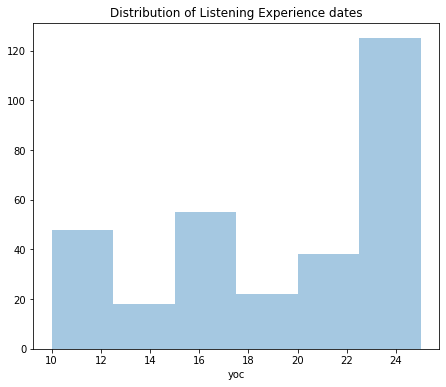

In [129]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(df_perf['yoc'], kde=False);
plt.title('Distribution of Listening Experience dates');

Visualizing sentiments over time:

In [99]:
# reset_index() gives a column for counting, after groupby uses year and category
ctdf = (df_sent.reset_index()
          .groupby(['year','sentiment'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )

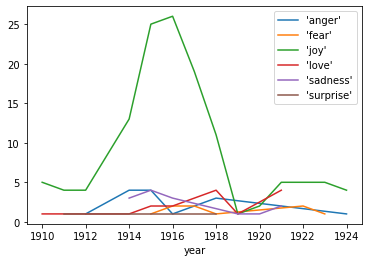

In [108]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('sentiment'):
    data.plot(x='year', y='ct', ax=ax, label=key)

Joy goes down after the war beginning, Sadness starts during the war, Surprise only emerges after war, Love increases during the war and after, Anger goes down after the war, Fear emerges during the war.

## Sentiment and Genres
Merging the datadrames to find interactions between genres and feelings

In [124]:
sent_genre= pd.merge(df_sent, df_genre, on="lexp")
sent_genre

,lexp,text,sentiment,yoc_x,year_x,genre,yoc_y,genre_label,year_y
0,http://data.open.ac.uk/led/lexp/1392134703765,Half an hour���s walk before dinner towards S...,'joy',17,1917,http://dbpedia.org/resource/Hymn,17,Hymn,1917
1,http://data.open.ac.uk/led/lexp/1400693267895,We have at last a gramophone and a very fine s...,'joy',17,1917,http://dbpedia.org/resource/Classical_music,17,Classical_music,1917
2,http://data.open.ac.uk/led/lexp/1401895084303,Today I had my Union Jack flying for the first...,'joy',17,1917,http://dbpedia.org/resource/National_anthem,17,National_anthem,1917
3,http://data.open.ac.uk/led/lexp/1401895912493,London is all beflagged. The streets are calme...,'joy',18,1918,http://dbpedia.org/resource/National_anthem,18,National_anthem,1918
4,http://data.open.ac.uk/led/lexp/1402936344970,"When the war ended, everybody celebrated, we m...",'joy',18,1918,http://dbpedia.org/resource/Popular_music,18,Popular_music,1918
...,...,...,...,...,...,...,...,...,...
111,http://data.open.ac.uk/led/lexp/1409693551541,It was on a Wednesday afternoon that Persinger...,'joy',23,1923,http://dbpedia.org/resource/Classical_music,23,Classical_music,1923
112,http://data.open.ac.uk/led/lexp/1433012802782,That memorable session at Bl��thner���s piano ...,'joy',23,1923,http://dbpedia.org/resource/Classical_music,23,Classical_music,1923
113,http://data.open.ac.uk/led/lexp/1434713465249,It was a busy time and that autumn Sir Edward ...,'joy',24,1924,http://dbpedia.org/resource/Classical_music,24,Classical_music,1924
114,http://data.open.ac.uk/led/lexp/1430310734878,"In the end I did go down, but only to shut him...",'anger',24,1924,http://dbpedia.org/resource/Blues,24,Blues,1924


In [125]:
sent_genre.to_csv('Data/sent_genre.csv')

## Genres linechart

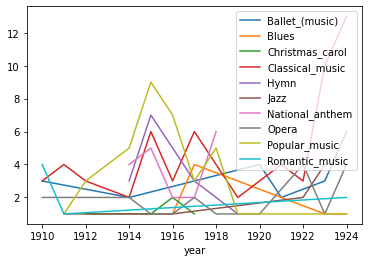

In [69]:
# reset_index() gives a column for counting, after groupby uses year and category
ctdf = (df_genre.reset_index()
          .groupby(['year','genre_label'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
         
       )
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('genre_label'):
    data.plot(x='year', y='ct', ax=ax, label=key)

In [71]:
ctdf.to_csv('Data/ctdf_genres.csv')

In [23]:
#data.loc[data[''] == 'Russian Empire', 'countryLabel'] = 'Russia'
sad=df_sent.loc[df_sent['sentiment'] == "'sadness'"] 
sad['text'][0]

'Arrive at Bombay at 6.00 am. Detrain at 9.00 am. A general scrum down for kit bags...Embark on SS Somali at 11.00 am, towed out of docks, and set sail at 3.00 pm. The band of a Mahratta Regiment was formed up on the quayside and we slowly glided away to the tune of ���Should Old Acquaintance be Forgot���. I felt an infinite sadness. I remained on deck until Malabar point and the last vestige of the shores of India faded from view. I had left India behind for good, India where I spent the happiest years of my soldiering. I felt lonely and depressed, I can���t explain why.\r\n'

In [52]:
#data.loc[data[''] == 'Russian Empire', 'countryLabel'] = 'Russia'
fear_list=[]
fear=df_sent.loc[df_sent['sentiment'] == "'fear'"] 

print(fear['lexp'][1],fear['text'][1])


http://data.open.ac.uk/led/lexp/1427546072789 I was so frightened the first time I walked out on stage that Nugent had to hold my arm to prevent me from falling flat on my face. Our entrance was a man-and-wife argument...

Acting disgusted, Nugent would say, "I'm going off to my other chick."...

"When I see how my man treats me," I'd moan, "I get the St.Louis Blues."

Then I would sing "St. Louis Blues," but very softly. It was the first time that kind of Negro audience ever let my kind of low singing get by. And you could have heard a pin drop in that rough, rowdy audience out front. 

For years they had been used to Bessie Smith and Ma Rainey. They loved them and all the other shouters. I could always riff and jam and growl, but I never had that loud approach. 

That first time, when I finished singing "St. Louis Blues," the money fell like rain on the stage. Nugent had to come on again to get me off or I would have been sitting there yet. But first he picked up the silver for me--t

In [51]:
love=df_sent.loc[df_sent['sentiment'] == "'love'"] 

print(love['lexp'][51], love['text'][51])

http://data.open.ac.uk/led/lexp/1409693248514 Of the many reasons I have to hold Persinger in loving remembrance, none is greater than his setting high my sights from the beginning. At our first lesson I was told to play some little thing and was advised on this and that, but these preliminaries speedily dispatched, Persinger invited Imma and me to sit down, took up his violin, and announced he would play for us. With admirable intuition, this man who made no profession of teaching little children chose not to stun us with pyrotechnics, but to exalt us with one of the noblest works ever written, the Adagio from Bach���s Sonata in G Minor for Solo Violin. So passionate and moving is this improvised Adagio that many years later in my presence, Pablo Casals, abandoning himself at the keyboard, gave it a mock-Hungarian-cybalom, broken-chord accompaniment, insisting that it proved Bach to have had gypsy blood! At the time, aged five, hearing the Adagio for the first time, such speculations 

In [59]:
anger=df_sent.loc[df_sent['sentiment'] == "'anger'"]
print(anger['lexp'][3],anger['text'][3])


http://data.open.ac.uk/led/lexp/1430310734878 In the end I did go down, but only to shut him up. Florence Mills was vivacious, a cutie, and a whirlwind when it came to selling a song and dance. But she had a small voice. They had been using a choir around her to get volume, and then Florence would come in and sing the punch line. However, she was a public idol, and I didn't think that following her at the Plantation was going to be easy. But I went there for the tryout, and in those days I was as trim and shapely as Florence or anyone else. 

Mr. Salvin, along with Harry Akst and Joe Howard, who were writing the songs for that floor show, was there for my audition. They asked me to do a couple of my own numbers, and I started off with "Georgia Blues." I could see that Sam Salvin was tremendously impressed. 



In [74]:
joy=df_sent.loc[df_sent['sentiment'] == "'joy'"]
print(joy['lexp'][180],joy['text'][180])
#Roland was serving on the Western Front with 4th Battalion, The Norfolk Regiment. ->

http://data.open.ac.uk/led/lexp/1399990653596 I was up at 3.45 this morning for the famous May Morning ceremony ... as the clock struck four all the people turned towards the tower & became absolutely silent. Then immediately after, as the sun was rising, the choristers on the top of Magdalen tower sang the May Morning Latin hymn, turning towards the sun ... I could quite easily have wept at the beauty & pain of it. I couldn���t help thinking how different everything is from what we pictured it would be, & how you had meant to be here, & how you would have loved it if you had been...


In [67]:
surprise=df_sent.loc[df_sent['sentiment'] == "'surprise'"]
print(surprise['lexp'][33],surprise['text'][33])

http://data.open.ac.uk/led/lexp/1405932723082 "God Save the King"  and ���The Marseillaise".

Sitting on my pack after finishing breakfast, I noticed movement in the chateau. The shutters being flung open, and at one of the windows appeared a lady. She opened the window and spoke in French to the Colonel in the courtyard below. I smiled at "Old Ted's" efforts to grasp her meaning.  An interpreter explained to him what was meant. Immediately after the "Fall In" sounded, and struggling into our packs, we soon lined up in the customary formation of two were. Beyond a guess that he was complying with a request made by the French lady, we got no further. 

He formed the battalion in three sides of a square, with the band inside, facing the house. The lady, grey haired, stately, not haughty but charming, stood in view of the troops watching our movements with interest. That this was all for her benefit was obvious, and when the last unit, or section was in place, the Colonel told us that the